Breast Cancer Prediction Notebook

# Import Data


 Mount Google Drive

In [372]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [373]:
data_path = "/content/drive/MyDrive/261_Data/data.csv"

**Import Libraries**

In [374]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

**Construct dataframe**

In [375]:
data = pd.read_csv(data_path);

df = pd.DataFrame(data)

**Drop Duplicates**

In [376]:
df = df.drop_duplicates()

# **Fill Na values**

Fill Null Values with the mean of each feature

In [377]:
import warnings

# Assuming df is your original DataFrame
df1 = df.copy()

warnings.filterwarnings('ignore')

# Calculate mean only for numeric columns
numeric_means = df1.select_dtypes(include=[np.number]).mean()

# Fill NaN values only in numeric columns with their respective mean
df1.fillna(numeric_means, inplace=True)

# For non-numeric columns, you might want to fill NaNs with a specific value or use another method
# Example: df2['non_numeric_column'].fillna('default_value', inplace=True)

df1.dropna(inplace=True)

# Count the number of NaN values in each column to verify
print(f'Remaining Null Values =  {df1.isnull().sum().sum()}')

Remaining Null Values =  0


# **Re-Labeling non-numerical values**



Remove irrelevant features

In [378]:
df1 = df1.drop(columns=['patient_id', 'cohort', 'her2_status', 'er_status'])

Label Categorical columns in-place.

In [379]:
from sklearn.preprocessing import LabelEncoder

# Convert set to list
categorical_columns = ["cancer_type", "cellularity", "pam50_+_claudin-low_subtype", "er_status_measured_by_ihc", "her2_status_measured_by_snp6", "inferred_menopausal_state", "primary_tumor_laterality", "pr_status", "3-gene_classifier_subtype", "death_from_cancer"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df1[col] = label_encoder.fit_transform(df1[col])


Handle non-categorical columns

In [380]:
# Convert all non-numeric columns to numeric using one-hot encoding
df1 = pd.get_dummies(df1)

In [381]:
df1.shape

(1211, 5898)

# Remove Anomalies and Outliers


In [382]:
# Separate features and target
features = df1.drop('cancer_type', axis=1)
target = df1['cancer_type']

In [383]:
from sklearn.cluster import DBSCAN

eps = 30  # Distance threshold
min_samples = 5  # Minimum number of samples to form a dense region
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(features)

# Mark anomalies as -1
features = features[labels != -1]
target = target[labels != -1]

In [384]:
features.shape

(890, 5897)

# **Split Data**

Split the data into 80% train and 20% test.
We are planning to do cross-validation beacuse the training dataset is small

In [385]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target,train_size=0.8, test_size=0.2, random_state=42)

# Further split the train data into train and validation sets
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# Print the shapes of the resulting datasets
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
# print('x_val shape:', x_val.shape)
# print('y_val shape:', y_val.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (712, 5897)
y_train shape: (712,)
x_test shape: (178, 5897)
y_test shape: (178,)


# **Scaling Data**

Normalize Data by scaling it using MinMaxScaler

In [386]:

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(x_train)

# Transform the features
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


# **Step 3: Re-sampling the data using SMOTE**

In [387]:
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Over-sample data to balance cancer types

In [388]:
from imblearn.over_sampling import SMOTE

x_train, y_train = SMOTE(random_state=42).fit_resample(x_train, y_train)

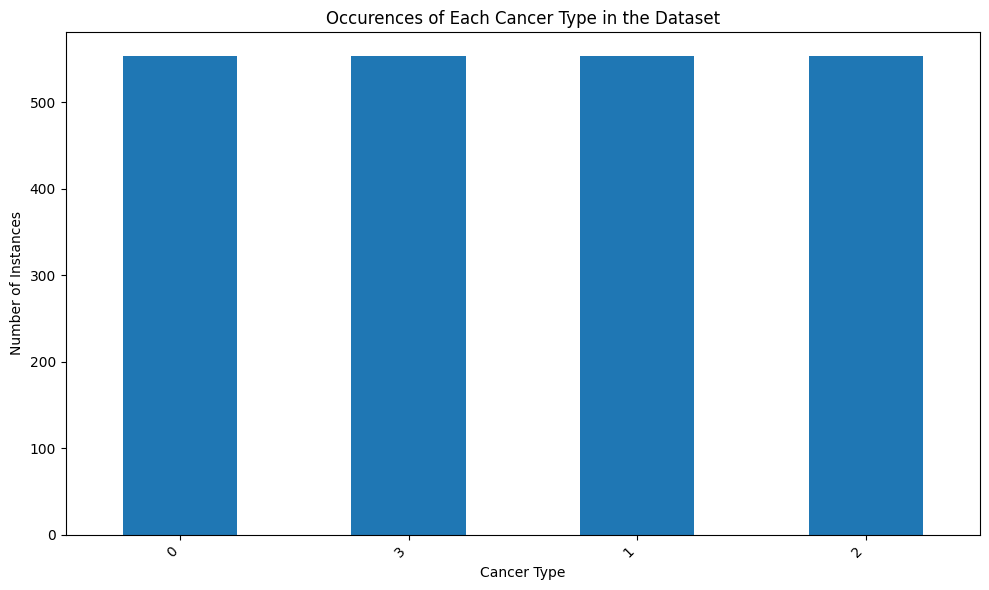

In [389]:
#ploting the new re-sampled data

cancer_counts = y_train.value_counts()

plt.figure(figsize=(10, 6))
cancer_counts.plot(kind='bar')
plt.title('Occurences of Each Cancer Type in the Dataset')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjust the layout to make room for the label
plt.show()

# Dimensionality Reduction


Dimensionality Reduction is used to visualize the data

On Train

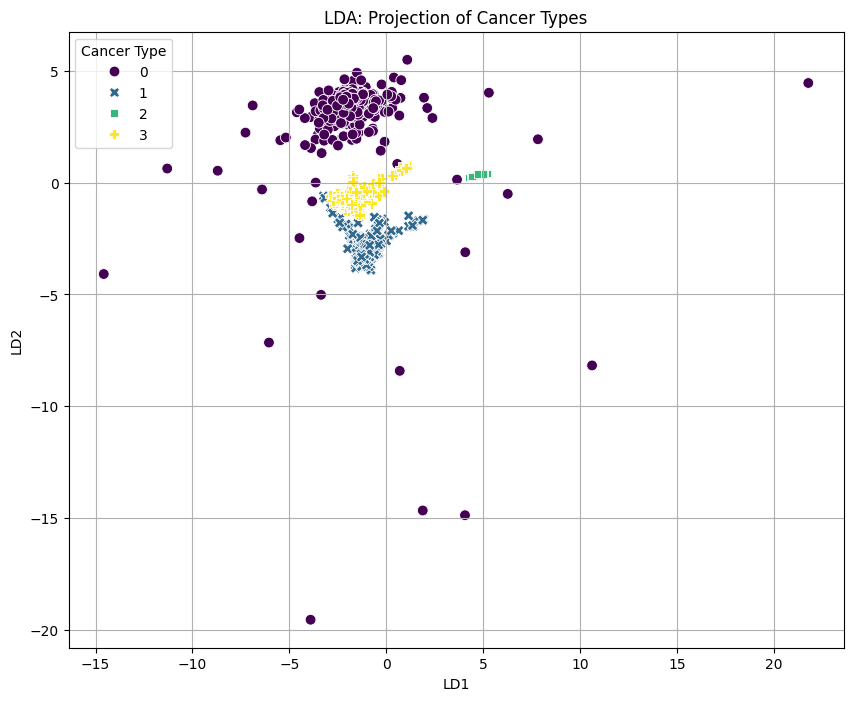

In [390]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

y_train = y_train.values.ravel()

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 dimensions for easy visualization
x_train_scaled_reduced = lda.fit_transform(x_train, y_train)

# Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_train_scaled_reduced[:, 0], y=x_train_scaled_reduced[:, 1], hue=y_train, palette='viridis', style=y_train, s=60)
plt.title('LDA: Projection of Cancer Types')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(title='Cancer Type')
plt.grid(True)
plt.show()


On Test

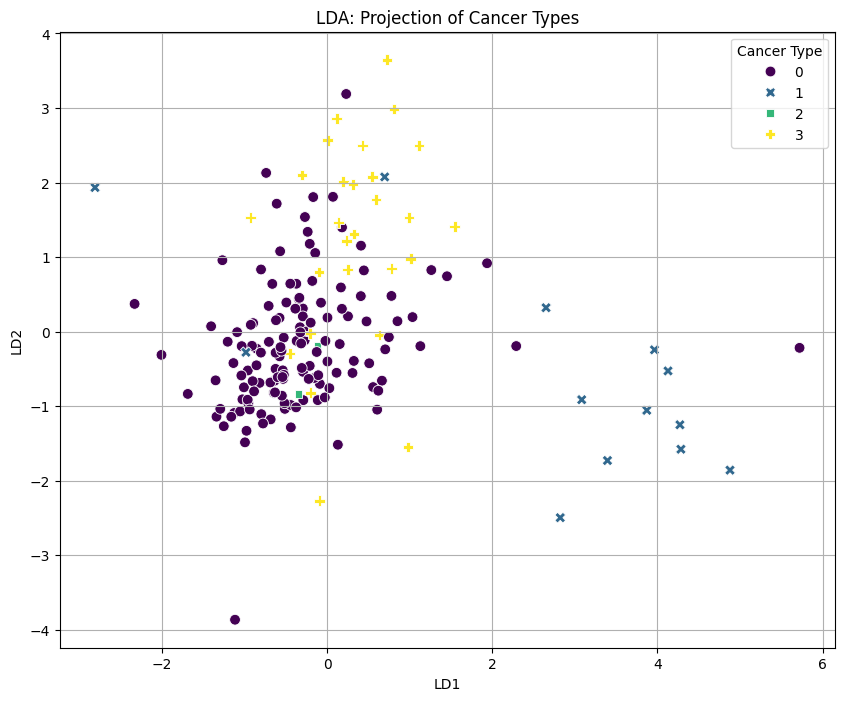

In [391]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

y_test = y_test.values.ravel()

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 dimensions for easy visualization
x_test_scaled_reduced = lda.fit_transform(x_test, y_test)

# Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_test_scaled_reduced[:, 0], y=x_test_scaled_reduced[:, 1], hue=y_test, palette='viridis', style=y_test, s=60)
plt.title('LDA: Projection of Cancer Types')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(title='Cancer Type')
plt.grid(True)
plt.show()


# **Logistic Regression**

Build and Test a Logistic Regression Model

In [392]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Calculate cross-validation accuracy
accuracy_scores = cross_val_score(lr_model, x_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation accuracy:", accuracy_scores)


Cross-validation accuracy: [0.93905192 0.95936795 0.96832579 0.96606335 0.96832579]


Plot Logistic Regression Learning curve

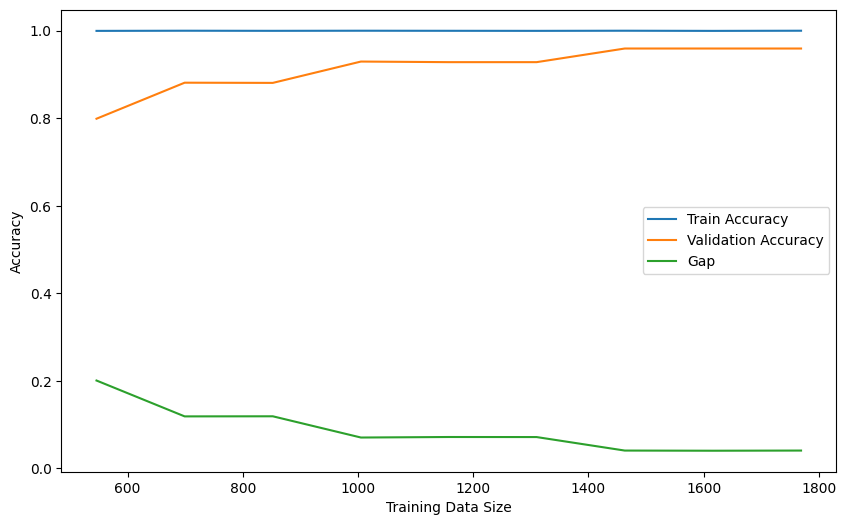

In [393]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Define training sizes
train_sizes = np.linspace(0.05, 1, 12)

# Calculate learning curves for accuracy and F1 score
N_train, train_scores, val_scores = learning_curve(LogisticRegression(), x_train, y_train, cv=5, scoring='accuracy', train_sizes=train_sizes)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(N_train, train_scores.mean(axis=1), label='Train Accuracy')
plt.plot(N_train, val_scores.mean(axis=1), label='Validation Accuracy')
plt.plot(N_train, train_scores.mean(axis=1) - val_scores.mean(axis=1), label='Gap')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


The Model is overfitting, since the training validation is constant at 100%.

Therefore, we decided to apply feature selection using PCA + Hyper-parameter tuning the Logistic Regression Model.

In [394]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


pca_log_reg_pipeline = Pipeline([
    ('pca', PCA()),
    ('log_reg', LogisticRegression(random_state=42))
])

# Define the parameter grid for GridSearchCV
pca_log_reg_param_grid = {
    'pca__n_components': [400],
    'log_reg__C': [0.1,1,10],  # Inverse of regularization strength
    'log_reg__penalty': ['l1', 'l2'],  # Types of penalties (l1 is not supported with all solvers)
    'log_reg__solver': ['liblinear', 'saga']  # Solvers that support penalty='l1'
}

# Create the GridSearchCV object
pca_log_reg_grid_search = GridSearchCV(pca_log_reg_pipeline, pca_log_reg_param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
pca_log_reg_grid_search.fit(x_train, y_train)

# Best model
print("Best parameters:", pca_log_reg_grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(pca_log_reg_grid_search.best_score_))

# Test the model
y_pred = pca_log_reg_grid_search.predict(x_test)
pca_log_reg_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(pca_log_reg_accuracy))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'log_reg__C': 10, 'log_reg__penalty': 'l2', 'log_reg__solver': 'saga', 'pca__n_components': 400}
Best cross-validation accuracy: 0.96
Test set accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       136
           1       0.39      0.54      0.45        13
           2       0.00      0.00      0.00         2
           3       0.18      0.07      0.11        27

    accuracy                           0.75       178
   macro avg       0.35      0.38      0.36       178
weighted avg       0.69      0.75      0.71       178


Confusion Matrix:
[[124   4   0   8]
 [  5   7   0   1]
 [  2   0   0   0]
 [ 18   7   0   2]]


# **Random Forest**

Build and Test Random Forest Model, because it offers ensemble learning.

In [395]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation with 5 folds
cv_results = cross_validate(rf_model, x_train, y_train, cv=5, scoring=['accuracy', 'f1_macro'])

# Print the average validation accuracy and f1 measure
print("Average validation accuracy:", cv_results['test_accuracy'].mean())
print("Average validation f1 measure:", cv_results['test_f1_macro'].mean())


Average validation accuracy: 0.9774082510239728
Average validation f1 measure: 0.9774739275362212


Plot the Learning Curve to learn about the performance of the Random Forest Model

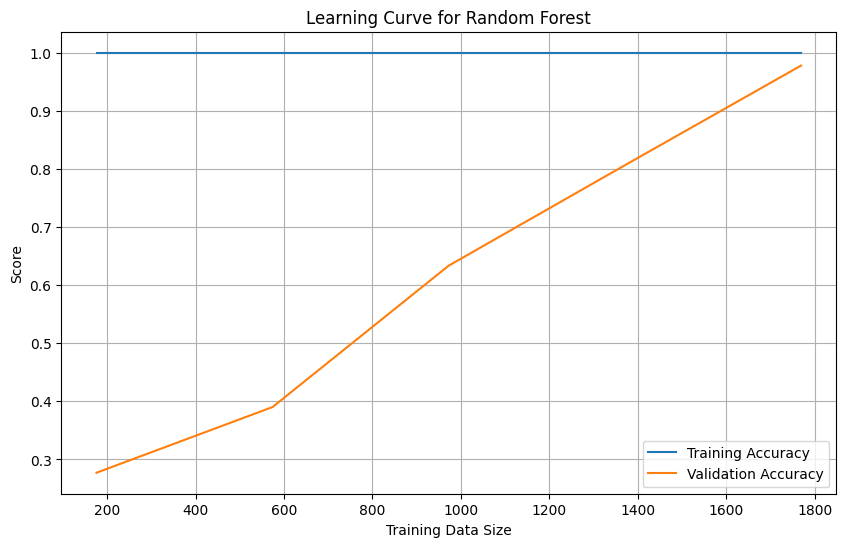

In [396]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_model, x_train, y_train, cv=5, scoring='accuracy')

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Accuracy')
plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

The Model is overfitting, since the training validation is constant at 100%.

Therefore, we decided to apply feature selection using PCA + Hyper-parameter tuning the RandomForest Model.

In [397]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


pca_rf_pipeline = Pipeline([
    ('pca', PCA()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for GridSearchCV
pca_rf_param_grid = {
    'pca__n_components': [200,400],
    'rf__n_estimators': [50,100],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [5, 10],
    'rf__min_samples_leaf': [2, 4]
}

# Create the GridSearchCV object
pca_rf_grid_search = GridSearchCV(pca_rf_pipeline, pca_rf_param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
pca_rf_grid_search.fit(x_train, y_train)

# Best model
print("Best parameters:", pca_rf_grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(pca_rf_grid_search.best_score_))

# Test the model
y_pred = pca_rf_grid_search.predict(x_test)
pca_rf_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(pca_rf_accuracy))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'pca__n_components': 400, 'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}
Best cross-validation accuracy: 0.98
Test set accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       136
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        27

    accuracy                           0.76       178
   macro avg       0.19      0.25      0.22       178
weighted avg       0.58      0.76      0.66       178


Confusion Matrix:
[[135   0   0   1]
 [ 13   0   0   0]
 [  2   0   0   0]
 [ 27   0   0   0]]


# Support Vector Machine


In [398]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

# Create a support vector machine classifier
svm_model = SVC(random_state=42)

# Perform cross-validation with 5 folds
cv_results = cross_validate(svm_model, x_train, y_train, cv=5, scoring=['accuracy', 'f1_macro'])

# Print the average validation accuracy and f1 measure
print("Average validation accuracy:", cv_results['test_accuracy'].mean())
print("Average validation f1 measure:", cv_results['test_f1_macro'].mean())


Average validation accuracy: 0.8752489709201965
Average validation f1 measure: 0.87334955323498


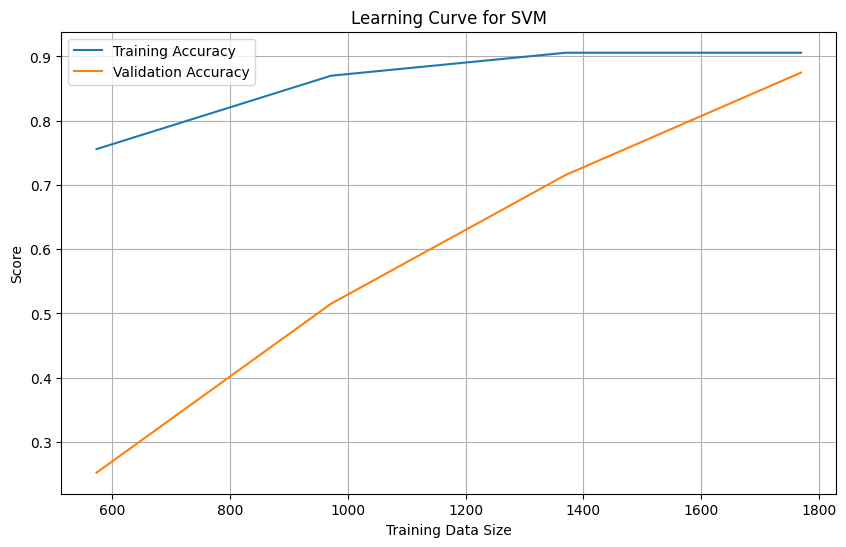

In [399]:
import matplotlib.pyplot as plt
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(svm_model, x_train, y_train, cv=5, scoring='accuracy')

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Accuracy')
plt.title('Learning Curve for SVM')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

The Model is overfitting, since the training validation is constant at 100%.

Therefore, we decided to apply feature selection using PCA + Hyper-parameter tuning the SVC Model.

In [430]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


pca_svc_pipeline = Pipeline([
    ('pca', PCA()),
    ('svc', SVC(random_state=42))
])

# Define the parameter grid for GridSearchCV
pca_svc_param_grid = {
    'pca__n_components': [300,500],
    'svc__kernel': ['rbf'],
    'svc__C': [10, 15],
    'svc__gamma': ['auto', 'scale'],
    'svc__degree': [1,2],
    'svc__max_iter': [500,700]
}

# Create the GridSearchCV object
pca_svc_grid_search = GridSearchCV(pca_svc_pipeline, pca_svc_param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
pca_svc_grid_search.fit(x_train, y_train)

# Best model
print("Best parameters:", pca_svc_grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(pca_svc_grid_search.best_score_))

# Test the model
y_pred = pca_svc_grid_search.predict(x_test)
pca_svc_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(pca_svc_accuracy))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'pca__n_components': 300, 'svc__C': 15, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__max_iter': 700}
Best cross-validation accuracy: 0.99
Test set accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88       136
           1       0.62      0.38      0.48        13
           2       0.00      0.00      0.00         2
           3       0.50      0.04      0.07        27

    accuracy                           0.79       178
   macro avg       0.48      0.35      0.36       178
weighted avg       0.73      0.79      0.72       178


Confusion Matrix:
[[134   1   0   1]
 [  8   5   0   0]
 [  2   0   0   0]
 [ 24   2   0   1]]


# Neural Network


In [439]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import LeakyReLU

# Define the model creation function
def create_model(learning_rate, l1_reg, monitor, loss,optimizer, outputactivation, dropoutL1, dropoutL2, dropoutL3):
    model = Sequential()
    model.add(Dense(units=64, activation=LeakyReLU(), kernel_regularizer=l1(l1_reg), input_shape=(x_train.shape[1],)))
    model.add(Dropout(dropoutL1))
    model.add(Dense(units=256, activation=LeakyReLU()))
    model.add(Dropout(dropoutL2))
    model.add(Dense(units=128, activation=LeakyReLU()))
    model.add(Dropout(dropoutL3))
    model.add(Dense(units=len(df['cancer_type'].unique()), activation= outputactivation))
    model.compile(optimizer=optimizer(learning_rate=learning_rate), loss=loss, metrics=['accuracy'])

    # Define the early stopping callback
    early_stopping = EarlyStopping(monitor=monitor, patience=5)

    return model, early_stopping, learning_rate, l1_reg,monitor,loss,optimizer,outputactivation,dropoutL1,dropoutL2,dropoutL3

# Define the parameter grid
param_grid = {
    'learning_rate': [0.0003],
    'l1_reg': [0.0003],
    'monitor': ['accuracy'],
    'loss': ['sparse_categorical_crossentropy'],
    'optimizer': [tf.keras.optimizers.Nadam],
    'outputactivation': ['softmax'],
     'dropoutL1': [0.2,0.3],
    'dropoutL2': [0.3,0.4],
    'dropoutL3': [0.2, 0.3]
}

# Define the model evaluation function
def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Train the model on the training set
    current_model = model[0]
    current_model.fit(x_train, y_train, epochs=30, batch_size=32, callbacks=[model[1]])

    # Make predictions on the test set
    y_pred = current_model.predict(x_test).argmax(axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy



In [440]:
from sklearn.metrics import accuracy_score, f1_score
import itertools

best_accuracy_nn = 0
best_accuracy_model = None

for params in itertools.product(*param_grid.values()):
    print(params)
    model = create_model(*params)
    accuracy  = evaluate_model(model, x_train, y_train, x_test, y_test)
    if accuracy > best_accuracy_nn:
        print("Best accuracy is : ------ :", accuracy )
        best_accuracy_nn = accuracy
        best_accuracy_model = model


print("Best Acc score:", best_accuracy_nn)
print("Best Acc model:", best_accuracy_model)


(0.0003, 0.0003, 'accuracy', 'sparse_categorical_crossentropy', <class 'keras.src.optimizers.nadam.Nadam'>, 'softmax', 0.2, 0.3, 0.2)
Epoch 1/30
70/70 [==============================] - 5s 14ms/step - loss: 2.3418 - accuracy: 0.4277
Epoch 2/30
70/70 [==============================] - 1s 16ms/step - loss: 1.1160 - accuracy: 0.6293
Epoch 3/30
70/70 [==============================] - 1s 15ms/step - loss: 0.8464 - accuracy: 0.7324
Epoch 4/30
70/70 [==============================] - 1s 16ms/step - loss: 0.6969 - accuracy: 0.7988
Epoch 5/30
70/70 [==============================] - 1s 16ms/step - loss: 0.5976 - accuracy: 0.8585
Epoch 6/30
70/70 [==============================] - 1s 10ms/step - loss: 0.5275 - accuracy: 0.8766
Epoch 7/30
70/70 [==============================] - 1s 9ms/step - loss: 0.4661 - accuracy: 0.9064
Epoch 8/30
70/70 [==============================] - 1s 9ms/step - loss: 0.4071 - accuracy: 0.9340
Epoch 9/30
70/70 [==============================] - 1s 9ms/step - loss: 0.36

In [446]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

nn_best_model = best_accuracy_model[0]

# Make predictions on the test set
y_pred = best_accuracy_model[0].predict(x_test).argmax(axis=1)

# Calculate and print the metrics
nn_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion_matrix)

6/6 [==============================] - 0s 5ms/step
Accuracy: 0.7865168539325843
F1 Score: 0.7172575012546514
Precision: 0.6592237134137883
Recall: 0.7865168539325843
Confusion Matrix:
 [[133   3   0   0]
 [  6   7   0   0]
 [  2   0   0   0]
 [ 21   6   0   0]]


# Selecting Best Model

In [447]:
# prompt: select best model or pipeline based on accuracy, I already have the accuracies for each model , so I want to get each model and accuracy. Compare and select the best. Note some are grids that contain the best model

models = [
    {"model": pca_log_reg_grid_search, "accuracy": pca_log_reg_accuracy},
    {"model": pca_rf_grid_search, "accuracy": pca_rf_accuracy},
    {"model": pca_svc_grid_search, "accuracy": pca_svc_accuracy},
    {"model": nn_best_model, "accuracy": nn_accuracy}
]

best_model = None
best_accuracy = 0

for model_info in models:
    if model_info["accuracy"] > best_accuracy:
        best_model = model_info["model"]
        best_accuracy = model_info["accuracy"]

print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)


Best Model: GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('svc', SVC(random_state=42))]),
             param_grid={'pca__n_components': [300, 500], 'svc__C': [10, 15],
                         'svc__degree': [1, 2], 'svc__gamma': ['auto', 'scale'],
                         'svc__kernel': ['rbf'], 'svc__max_iter': [500, 700]},
             scoring='accuracy', verbose=1)
Best Accuracy: 0.7865168539325843


In [451]:
import pickle

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model.best_estimator_, f)
